In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_all = pd.read_csv('prices-split-adjusted.csv', parse_dates=True)

In [ ]:
df_all.shape

(851264, 7)

In [ ]:
df_all.head(10)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,6.499362e+01,7.520389e+01,1.66,3.127000e+01,4.846000e+01,7.512000e+01,1.584440e+03
close,851264.0,6.501191e+01,7.520122e+01,1.59,3.129278e+01,4.848000e+01,7.514000e+01,1.578130e+03
low,851264.0,6.433654e+01,7.445952e+01,1.50,3.094000e+01,4.797000e+01,7.440000e+01,1.549940e+03
high,851264.0,6.563975e+01,7.590686e+01,1.81,3.162000e+01,4.896000e+01,7.585000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08


In [ ]:
df_all.isnull().sum()

,0
date,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


In [ ]:
# WLTW
data = df_all[['date', 'open', 'close']][df_all['symbol']=='WLTW']
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Находим недостающие даты и добавляем в датафрейм
all_days = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
df_all_days = data.reindex(all_days)
df_filled = df_all_days.fillna({'open': 0, 'close': 0})

# Заполняем недостающие даты предыдущими значениями open и close
df = df_filled.copy()
df['open'].replace(0, pd.NA, inplace=True)
df['close'].replace(0, pd.NA, inplace=True)

df['open'] = df['open'].fillna(method='ffill')
df['close'] = df['close'].fillna(method='ffill')

df['open'].replace(0, pd.NA, inplace=True)
df['close'].replace(0, pd.NA, inplace=True)

df['open'] = df['open'].fillna(method='ffill')
df['close'] = df['close'].fillna(method='ffill')

df['open'].replace(0, pd.NA, inplace=True)
df['close'].replace(0, pd.NA, inplace=True)

df['open'] = df['open'].fillna(method='ffill')
df['close'] = df['close'].fillna(method='ffill')

df = df.reset_index().rename(columns={'index':'date'})
df.head(10)

,date,open,close
0,2016-01-05,123.430000,125.839996
1,2016-01-06,125.239998,119.980003
2,2016-01-07,116.379997,114.949997
3,2016-01-08,115.480003,116.620003
4,2016-01-09,115.480003,116.620003
5,2016-01-10,115.480003,116.620003
6,2016-01-11,117.010002,114.970001
7,2016-01-12,115.510002,115.550003
8,2016-01-13,116.459999,112.849998
9,2016-01-14,113.510002,114.379997


In [ ]:
# Объединяем поля open и close
df_open = df[['date', 'open']].copy()
df_open['type'] = 'open'
df_open.rename(columns={'open': 'value'}, inplace=True)

df_close = df[['date', 'close']].copy()
df_close['type'] = 'close'
df_close.rename(columns={'close': 'value'}, inplace=True)

df_combined = pd.concat([df_open, df_close])
df_combined.sort_values(by=['date', 'type'], inplace=True, ascending=[True, False])
df_combined = df_combined.reset_index(drop=True)
df_combined['date'] = pd.to_datetime(df_combined['date'])

df_combined.head(10)

,date,value,type
0,2016-01-05,123.430000,open
1,2016-01-05,125.839996,close
2,2016-01-06,125.239998,open
3,2016-01-06,119.980003,close
4,2016-01-07,116.379997,open
5,2016-01-07,114.949997,close
6,2016-01-08,115.480003,open
7,2016-01-08,116.620003,close
8,2016-01-09,115.480003,open
9,2016-01-09,116.620003,close


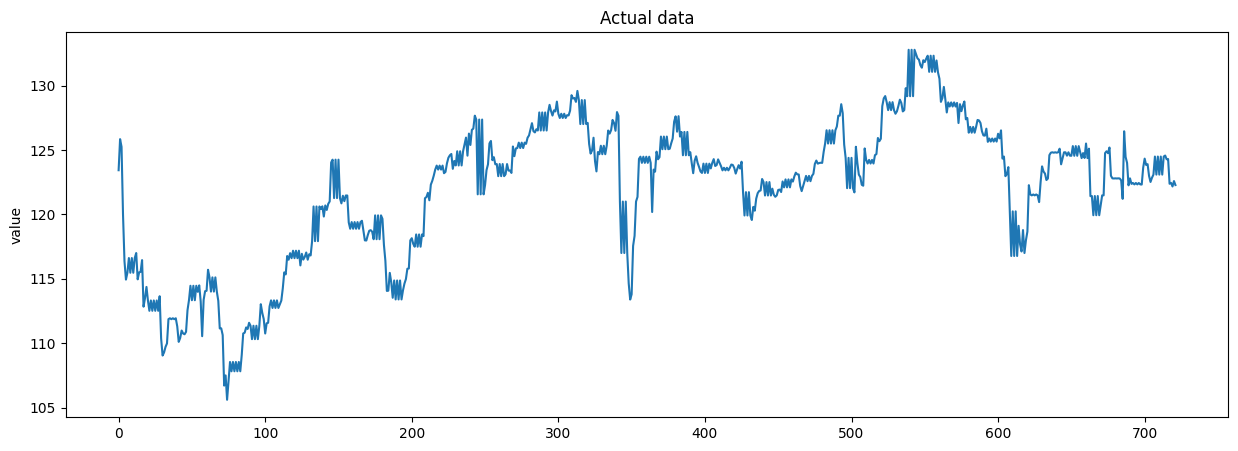

In [ ]:
df_combined = df_combined[['date', 'value']]

plt.figure(figsize=(15, 5))
plt.plot(df_combined['value'])
plt.ylabel('value')
plt.title('Actual data')
plt.show()

# Тренд Сезонность Цикличность

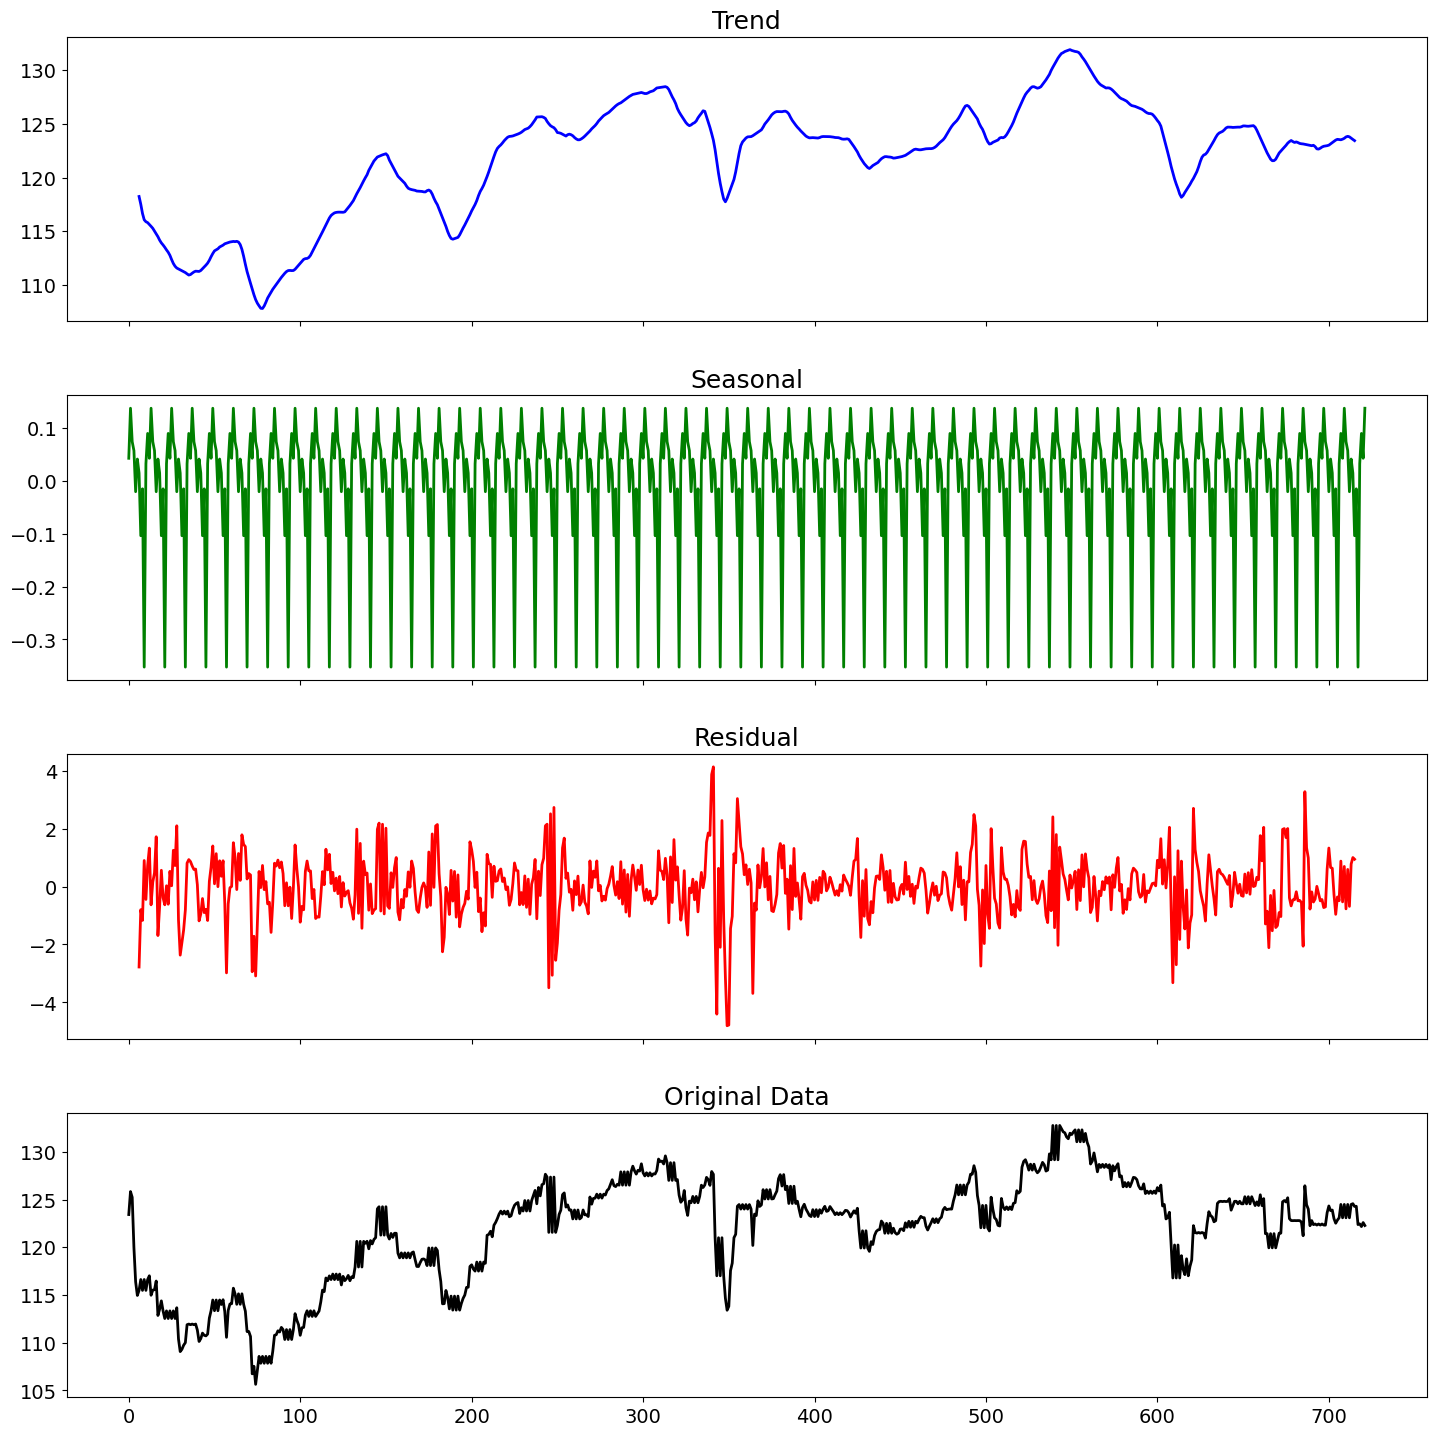

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_combined['value'], model='additive', period=12)
fig, axes = plt.subplots(4, 1, figsize=(15, 15), sharex=True)

# Тренд
axes[0].plot(result.trend, color='blue', linewidth=2)
axes[0].set_title('Trend', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=14)

# Сезонность
axes[1].plot(result.seasonal, color='green', linewidth=2)
axes[1].set_title('Seasonal', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=14)

# Остаток
axes[2].plot(result.resid, color='red', linewidth=2)
axes[2].set_title('Residual', fontsize=18)
axes[2].tick_params(axis='both', which='major', labelsize=14)

# Оригинальные данные
axes[3].plot(result.observed, color='black', linewidth=2)
axes[3].set_title('Original Data', fontsize=18)
axes[3].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout(pad=3.0)
plt.show()

# Тест Дики-Фуллера

In [ ]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(df_combined['value'])
print('Критерий ADF: %f' % test[0])
print('P-значение: %f' % test[1])
print('Критические значения:')
for key, value in test[4].items():
  print('\t%s: %.3f' % (key, value))

if test[0] < test[4]["5%"]:
  print ("Нулевая гипотеза отвергается, ряд стационарен.")
else:
  print ("Нулевая гипотеза не отвергается, ряд не стационарен.")

Критерий ADF: -2.164127
P-значение: 0.219522
Критические значения:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Нулевая гипотеза не отвергается, ряд не стационарен.


# Модель ARIMA без преобразования данных

In [ ]:
start_date = pd.to_datetime('2016-12-01')
train = df_combined[df_combined['date'] < start_date].value
test = df_combined[df_combined['date'] >= start_date].value

In [ ]:
!pip install optuna

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import itertools

In [ ]:
p = q = range(1, 40)
d = range(1, 3)
pdq = list(itertools.product(p, d, q))

def objective_arima(trial):
    order = trial.suggest_categorical('order', pdq)
    model = ARIMA(train, order=order)
    mdl = model.fit()
    predictions = mdl.forecast(len(test))
    mae = mean_absolute_error(test, predictions)
    return mae

study = optuna.create_study(direction="minimize")
study.optimize(objective_arima, n_trials=50)

In [ ]:
p, d, q = 36, 1, 38

model = ARIMA(train, order=(p, d, q))
mdl = model.fit()
pred = mdl.forecast(len(test))

In [ ]:
mae_arima = mean_absolute_error(test, pred)
print('MAE =', mae_arima)

real_direction = np.sign(test.diff().dropna())
predicted_direction = np.sign(np.diff(pred))
real_direction = real_direction[1:]
predicted_direction = predicted_direction[:len(real_direction)]
accuracy_direction_arima = np.mean(real_direction == predicted_direction)
print('Accuracy of Direction Prediction:', accuracy_direction_arima)

MAE = 1.3767989379889791
Accuracy of Direction Prediction: 0.6724137931034483


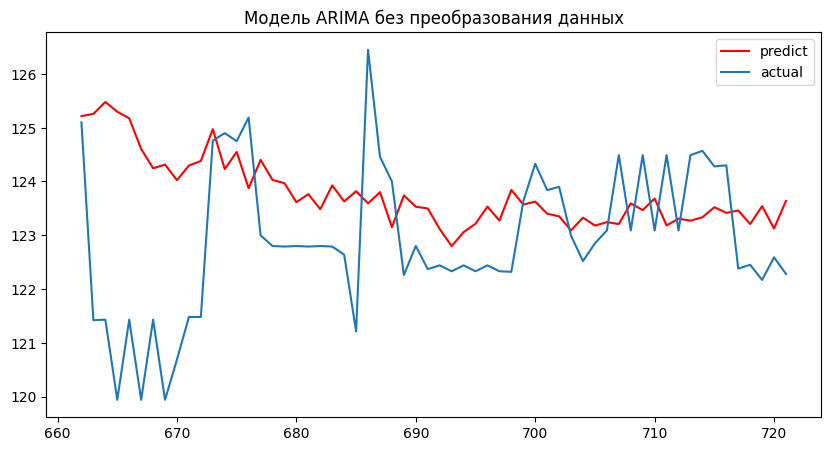

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pred, 'r', label = 'predict')
plt.plot(test, label = 'actual')
plt.title('Модель ARIMA без преобразования данных')
plt.legend()
plt.show()

# Логарифмирование + Дифференцирование

## Логарифмирование

In [ ]:
data1 = df_combined.copy()
data_log = np.log(data1['value'])

test = adfuller(data_log)
print('Тест Дики-Фуллера:')
print('Критерий ADF: %f' % test[0])
print('P-значение: %f' % test[1])
for key, value in test[4].items():
  print('\t%s: %.3f' % (key, value))

if test[0] < test[4]["5%"]:
  print ("Нулевая гипотеза отвергается, ряд стационарен.")
else:
  print ("Нулевая гипотеза не отвергается, ряд не стационарен.")

Тест Дики-Фуллера:
Критерий ADF: -2.152564
P-значение: 0.223910
	1%: -3.440
	5%: -2.866
	10%: -2.569
Нулевая гипотеза не отвергается, ряд не стационарен.


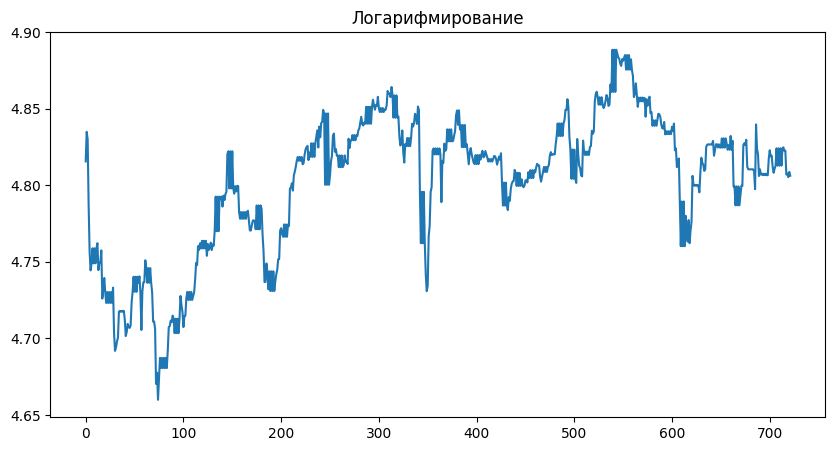

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data_log)
plt.title('Логарифмирование')
plt.grid(False)
plt.show()

Обнаружение выбросов и замена их на медианное значение

In [ ]:
Q1 = data_log.quantile(0.25)
Q3 = data_log.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_log[(data_log < lower_bound) | (data_log > upper_bound)]
median_value = data_log.median()
data_log[outliers.index] = median_value

## Дифференцирование

In [ ]:
data_log_diff = data_log.diff().dropna()

test = adfuller(data_log_diff)
print('Тест Дики-Фуллера:')
print('Критерий ADF: %f' % test[0])
print('P-значение: %f' % test[1])
for key, value in test[4].items():
  print('\t%s: %.3f' % (key, value))

if test[0] < test[4]["5%"]:
  print ("Нулевая гипотеза отвергается, ряд стационарен.")
else:
  print ("Нулевая гипотеза не отвергается, ряд не стационарен.")

Тест Дики-Фуллера:
Критерий ADF: -8.209661
P-значение: 0.000000
	1%: -3.440
	5%: -2.866
	10%: -2.569
Нулевая гипотеза отвергается, ряд стационарен.


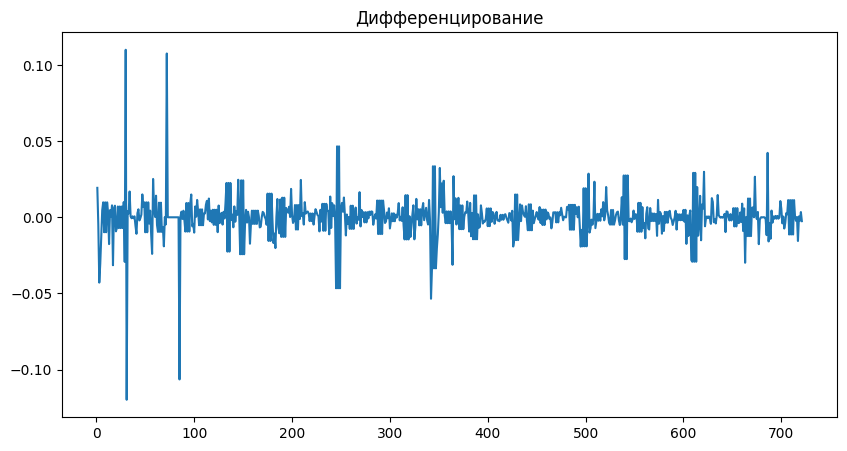

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data_log_diff)
plt.title('Дифференцирование')
plt.grid(False)
plt.show()

## Модель Хольта-Винтерса

In [ ]:
train = df_combined[df_combined['date']<'2016-12-01'].value
test = df_combined[df_combined['date']>='2016-12-01'].value

idx = df_combined[df_combined['date']=='2016-12-01'].index[0]
train_log_diff = data_log_diff[data_log_diff.index<idx]
test_log_diff = data_log_diff[data_log_diff.index>=idx]

train_log = data_log[data_log.index<idx]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
model_holt = ExponentialSmoothing(train_log_diff, damped_trend=True, trend='add',
                                  initialization_method='estimated', seasonal='add', seasonal_periods=12).fit()

pred_holt_log_diff = model_holt.forecast(len(test_log_diff))
pred_holt_log = train_log.iloc[-1] + pred_holt_log_diff.cumsum()
pred_holt = np.exp(pred_holt_log)

In [ ]:
mae_log_diff_holt = mean_absolute_error(test, pred_holt)
print('MAE =', mae_log_diff_holt)

real_direction = np.sign(test.diff().dropna())
predicted_direction = np.sign(np.diff(pred_holt))
real_direction = real_direction.iloc[1:]
predicted_direction = predicted_direction[:len(real_direction)]
accuracy_direction_log_diff_holt = np.mean(real_direction.values == predicted_direction)
print("Accuracy of Direction Prediction:", accuracy_direction_log_diff_holt)

MAE = 2.170929816213459
Accuracy of Direction Prediction: 0.3793103448275862


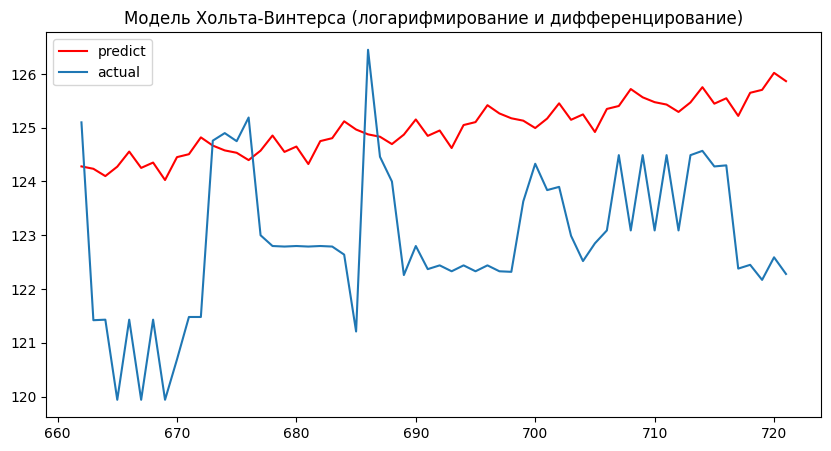

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test.index, pred_holt, 'r', label = 'predict')
plt.plot(test.index, test, label = 'actual')
plt.title('Модель Хольта-Винтерса (логарифмирование и дифференцирование)')
plt.legend()
plt.show()

## Модель ARIMA

In [ ]:
p = q = range(1, 40)
d = range(0, 3)
pdq = list(itertools.product(p, d, q))

def objective_arima(trial):
    order = trial.suggest_categorical('order', pdq)
    model = ARIMA(train_log_diff, order=order)
    mdl = model.fit()
    pred_arima = mdl.forecast(len(test_log_diff))
    pred_log = train_log.iloc[-1] + pred_arima.cumsum()
    pred = np.exp(pred_log)
    mae = mean_absolute_error(test, pred)
    return mae

study = optuna.create_study(direction="minimize")
study.optimize(objective_arima, n_trials=100)

In [ ]:
p, d, q = 7, 2, 5

model = ARIMA(train_log_diff, order=(p, d, q))
mdl = model.fit()
pred_arima = mdl.forecast(len(test_log_diff))
pred_log = train_log.iloc[-1] + pred_arima.cumsum()
pred = np.exp(pred_log)

In [ ]:
mae_log_diff_arima = mean_absolute_error(test, pred)
print('MAE =', mae_log_diff_arima)

real_direction = np.sign(test.diff().dropna())
predicted_direction = np.sign(np.diff(pred))
real_direction = real_direction.iloc[1:]
predicted_direction = predicted_direction[:len(real_direction)]
accuracy_direction_log_diff_arima = np.mean(real_direction.values == predicted_direction)
print("Accuracy of Direction Prediction:", accuracy_direction_log_diff_arima)

MAE = 1.4053281169337848
Accuracy of Direction Prediction: 0.5517241379310345


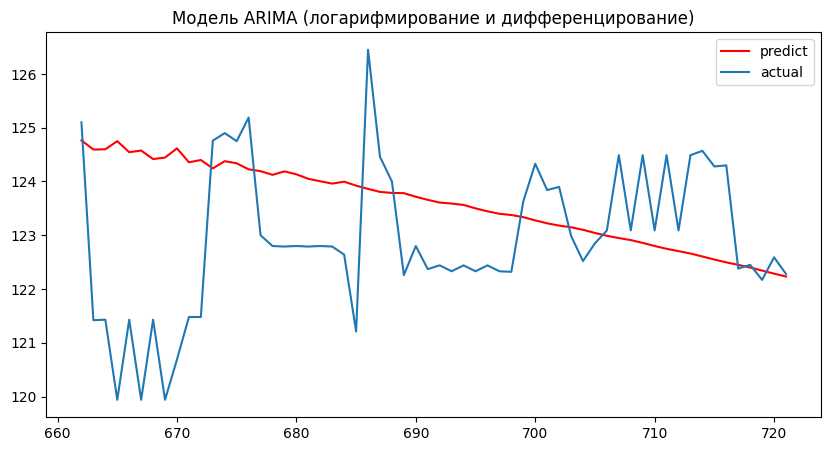

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test.index, pred, 'r', label = 'predict')
plt.plot(test.index, test, label = 'actual')
plt.title('Модель ARIMA (логарифмирование и дифференцирование)')
plt.legend()
plt.show()

## Модель SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
def objective_sarima(trial):
    p = q = range(1, 40)
    d = range(0, 3)
    s = range(12, 13)
    pdq = list(itertools.product(p, d, q))
    pdqs = list(itertools.product(p, d, q, s))
    order = trial.suggest_categorical('order', pdq)
    seasonal_order = trial.suggest_categorical('seasonal_order', pdqs)

    try:
        model = SARIMAX(train_log_diff, order=order, seasonal_order=seasonal_order)
        mdl = model.fit()
        pred_sarima = mdl.forecast(len(test_log_diff))
        pred_log = train_log.iloc[-1] + pred_sarima.cumsum()
        pred = np.exp(pred_log)
        mae = mean_absolute_error(test, pred)

    except Exception as e:
        print(f'Ошибка: {e}')
        mae = float('inf')

    return mae

study = optuna.create_study(direction="minimize")
study.optimize(objective_sarima, n_trials=100)

In [ ]:
p, d, q = 4, 1, 2
P, D, Q, s = 14, 1, 6, 12

model = SARIMAX(train_log_diff, order=(p, d, q), seasonal_order=(P, D, Q, s))
mdl = model.fit()
pred_sarima = mdl.forecast(len(test_log_diff))
pred_log = train_log.iloc[-1] + pred_sarima.cumsum()
pred = np.exp(pred_log)

In [ ]:
mae_log_diff_sarima = mean_absolute_error(test, pred)
print('MAE =', mae_log_diff_sarima)

real_direction = np.sign(test.diff().dropna())
predicted_direction = np.sign(np.diff(pred))
real_direction = real_direction.iloc[1:]
predicted_direction = predicted_direction[:len(real_direction)]
accuracy_direction_log_diff_sarima = np.mean(real_direction.values == predicted_direction)
print("Accuracy of Direction Prediction:", accuracy_direction_log_diff_sarima)

MAE = 1.5650282400791937
Accuracy of Direction Prediction: 0.4827586206896552


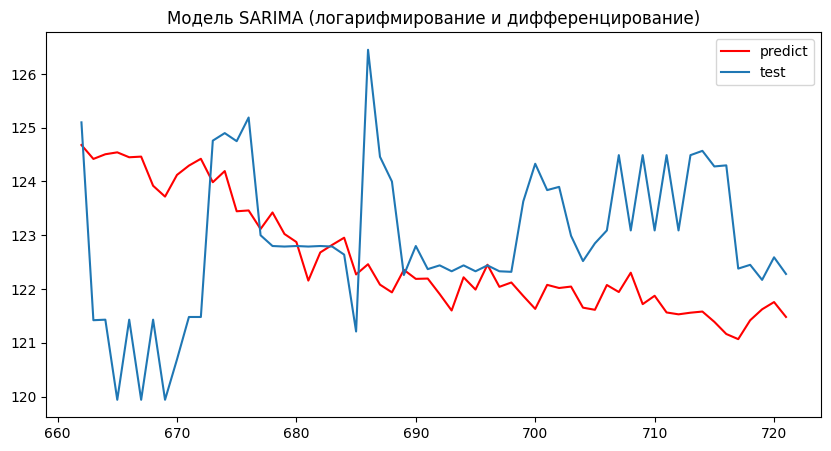

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test.index, pred, 'r', label = 'predict')
plt.plot(test.index, test, label = 'test')
plt.title('Модель SARIMA (логарифмирование и дифференцирование)')
plt.legend()
plt.show()

# Преобразование Бокса-Кокса + Дифференцирование

## Преобразование Бокса-Кокса

In [ ]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox # обратное преобразование Бокса-Кокса

In [ ]:
data2 = df_combined.copy()
data2['value_box'], lmbda = boxcox(data2['value'])
data_box = data2['value_box']

print('Оптимальный параметр преобразования Бокса-Кокса: %f' % lmbda)

test = adfuller(data_box)
print('Тест Дики-Фуллера:')
print('Критерий ADF: %f' % test[0])
print('P-значение: %f' % test[1])
for key, value in test[4].items():
  print('\t%s: %.3f' % (key, value))

if test[0] < test[4]["5%"]:
  print ("Нулевая гипотеза отвергается, ряд стационарен.")
else:
  print ("Нулевая гипотеза не отвергается, ряд не стационарен.")

Оптимальный параметр преобразования Бокса-Кокса: 7.445285
Тест Дики-Фуллера:
Критерий ADF: -0.429307
P-значение: 0.905089
	1%: -3.440
	5%: -2.866
	10%: -2.569
Нулевая гипотеза не отвергается, ряд не стационарен.


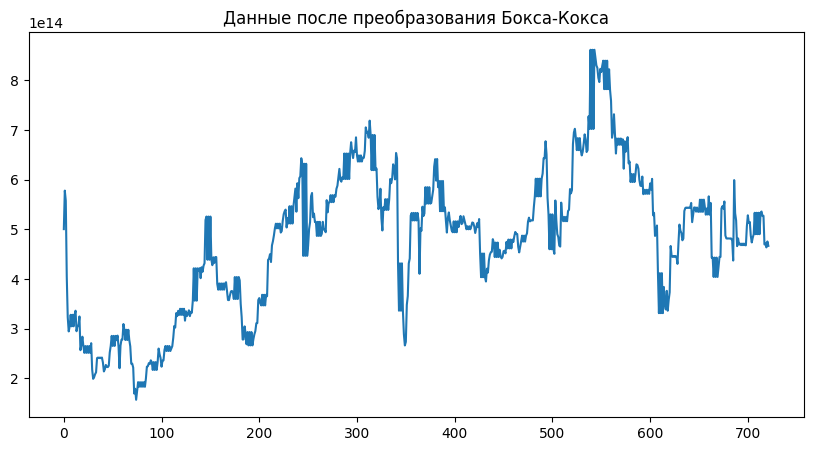

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data_box)
plt.title('Данные после преобразования Бокса-Кокса')
plt.show()

Обнаружение выбросов и замена их на медианное значение

In [ ]:
Q1 = data_box.quantile(0.25)
Q3 = data_box.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_box[(data_box < lower_bound) | (data_box > upper_bound)]
median_value = data_box.median()
data_box[outliers.index] = median_value

## Дифференцирование

In [ ]:
data_box_diff = data_box.diff().dropna()

test = adfuller(data_box_diff)
print('Тест Дики-Фуллера:')
print('Критерий ADF: %f' % test[0])
print('P-значение: %f' % test[1])
for key, value in test[4].items():
  print('\t%s: %.3f' % (key, value))

if test[0] < test[4]["5%"]:
  print ("Нулевая гипотеза отвергается, ряд стационарен.")
else:
  print ("Нулевая гипотеза не отвергается, ряд не стационарен.")

Тест Дики-Фуллера:
Критерий ADF: -10.312468
P-значение: 0.000000
	1%: -3.440
	5%: -2.866
	10%: -2.569
Нулевая гипотеза отвергается, ряд стационарен.


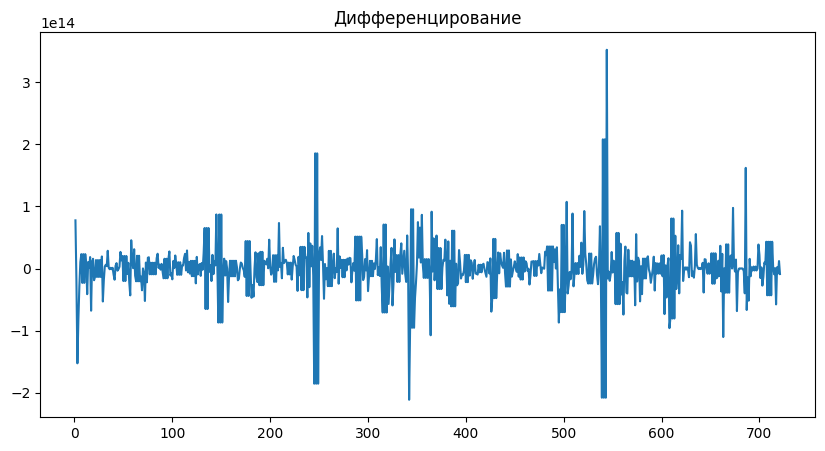

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data_box_diff)
plt.title('Дифференцирование')
plt.grid(False)
plt.show()

## Модель ARIMA

In [ ]:
idx = df_combined[df_combined['date']=='2016-12-01'].index[0]

train = df_combined[df_combined.index<idx].value
test = df_combined[df_combined.index>=idx].value

train_box_diff = data_box_diff[data_box_diff.index<idx]
test_box_diff = data_box_diff[data_box_diff.index>=idx]

train_box = data_box[data_box.index<idx]

In [ ]:
p = q = range(1, 40)
d = range(1, 3)
pdq = list(itertools.product(p, d, q))


def objective_arima(trial):
    order = trial.suggest_categorical('order', pdq)
    model = ARIMA(train_box_diff, order=order)
    mdl = model.fit()
    pred_box_diff = mdl.forecast(len(test_box_diff))
    pred_box = train_box.iloc[-1] + pred_box_diff.cumsum()
    pred = inv_boxcox(pred_box, lmbda)
    mae = mean_absolute_error(test, pred)
    return mae

study = optuna.create_study(direction="minimize")
study.optimize(objective_arima, n_trials=100)

In [ ]:
p, d, q = 10, 2, 31

model = ARIMA(train_box_diff, order=(p, d, q))
mdl = model.fit()
pred_box_diff = mdl.forecast(len(test_box_diff))
pred_box = train_box.iloc[-1] + pred_box_diff.cumsum()
pred = inv_boxcox(pred_box, lmbda)

In [ ]:
mae_box_diff_arima = mean_absolute_error(test, pred)
print('MAE =', mae_box_diff_arima)

real_direction = np.sign(test.diff().dropna())
predicted_direction = np.sign(np.diff(pred))
real_direction = real_direction.iloc[1:]
predicted_direction = predicted_direction[:len(real_direction)]
accuracy_direction_box_diff_arima = np.mean(real_direction.values == predicted_direction)
print("Accuracy of Direction Prediction:", accuracy_direction_box_diff_arima)

MAE = 1.497682132507208
Accuracy of Direction Prediction: 0.5344827586206896


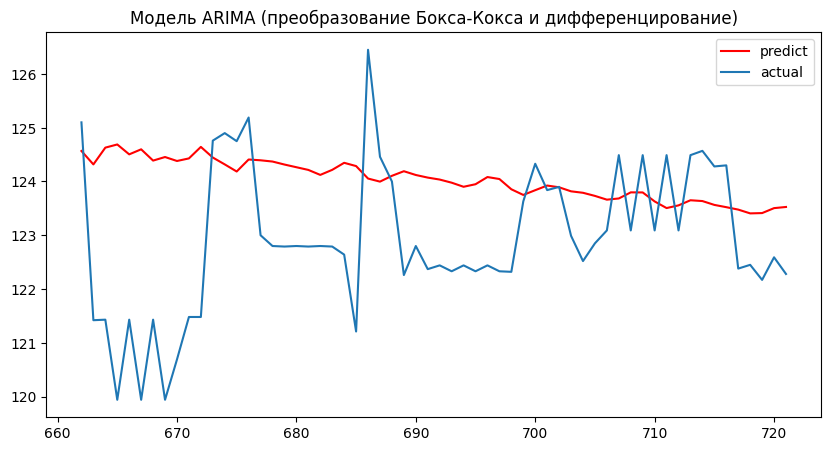

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test.index, pred, 'r', label = 'predict')
plt.plot(test.index, test, label = 'actual')
plt.title('Модель ARIMA (преобразование Бокса-Кокса и дифференцирование)')
plt.legend()
plt.show()

## Модель Хольта-Винтерса

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
model_holt = ExponentialSmoothing(train_box_diff, damped_trend=True, trend='add',
                                  initialization_method='estimated', seasonal='add', seasonal_periods=36).fit()

pred_box_diff = model_holt.forecast(len(test_box_diff))
pred_box = train_box.iloc[-1] + pred_box_diff.cumsum()
pred_holt = inv_boxcox(pred_box, lmbda)

In [ ]:
mae_box_diff_holt = mean_absolute_error(test, pred_holt)
print('MAE =', mae_box_diff_holt)

real_direction = np.sign(test.diff().dropna())
predicted_direction = np.sign(np.diff(pred_holt))
real_direction = real_direction.iloc[1:]
predicted_direction = predicted_direction[:len(real_direction)]
accuracy_direction_box_diff_holt = np.mean(real_direction.values == predicted_direction)
print("Accuracy of Direction Prediction:", accuracy_direction_box_diff_holt)

MAE = 1.6591272699285962
Accuracy of Direction Prediction: 0.39655172413793105


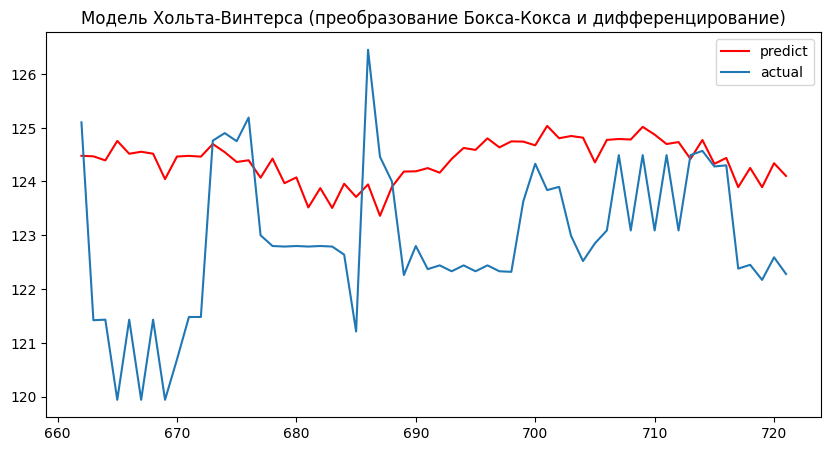

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test.index, pred_holt, 'r', label = 'predict')
plt.plot(test.index, test, label = 'actual')
plt.title('Модель Хольта-Винтерса (преобразование Бокса-Кокса и дифференцирование)')
plt.legend()
plt.show()

## Модель SARIMA

In [ ]:
p, d, q = 2, 1, 2
P, D, Q, s = 4, 1, 1, 12

model = SARIMAX(train_box_diff, order=(p, d, q), seasonal_order=(P, D, Q, s))
mdl = model.fit()
pred_sarima = mdl.forecast(len(test_box_diff))
pred_box = train_box.iloc[-1] + pred_sarima.cumsum()
pred = inv_boxcox(pred_box, lmbda)

In [ ]:
mae_box_diff_sarima = mean_absolute_error(test, pred)
print('MAE =', mae_box_diff_sarima)

real_direction = np.sign(test.diff().dropna())
predicted_direction = np.sign(np.diff(pred))
real_direction = real_direction.iloc[1:]
predicted_direction = predicted_direction[:len(real_direction)]
accuracy_direction_box_diff_sarima = np.mean(real_direction.values == predicted_direction)
print("Accuracy of Direction Prediction:", accuracy_direction_box_diff_sarima)

MAE = 1.5242430950074597
Accuracy of Direction Prediction: 0.39655172413793105


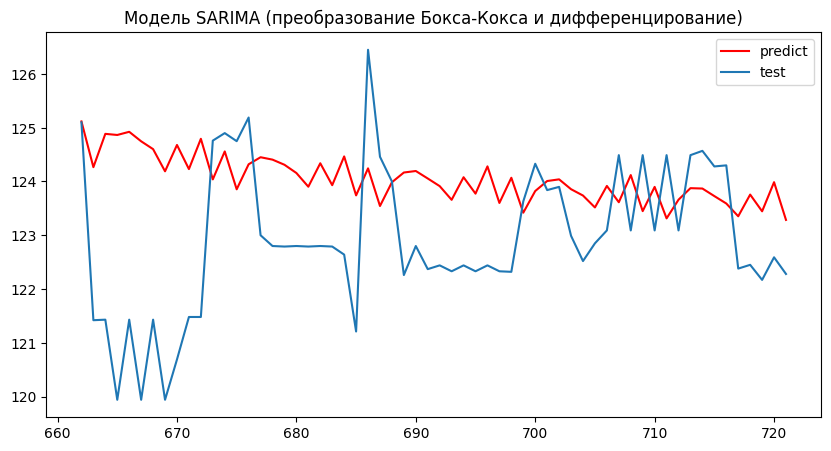

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test.index, pred, 'r', label = 'predict')
plt.plot(test.index, test, label = 'test')
plt.title('Модель SARIMA (преобразование Бокса-Кокса и дифференцирование)')
plt.legend()
plt.show()

# Random Forest

In [ ]:
!pip install tsfresh

In [ ]:
import numpy as np
import pandas as pd
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Вы можете выбрать другую стратегию заполнения, такую как 'median' или 'most_frequent'


# 1. Подготовка данных
df_shift, y = make_forecasting_frame(df_combined["value"], kind="power", max_timeshift=10, rolling_direction=1)

# 2. Извлечение признаков
X = extract_features(df_shift, column_id="id", column_sort="time", column_value="value", impute_function=np.nanmean, show_warnings=False)

Feature Extraction: 100%|██████████| 721/721 [01:07<00:00, 10.71it/s]


In [ ]:
# 3. Разделение данных на обучающую и тестовую выборку
X.dropna(axis='columns', inplace=True)
split_index = 661

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

param_distributions = {
    'n_estimators': np.arange(30, 200, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(np.arange(10, 110, 5)),
    'min_samples_split': np.arange(2, 30),
    'min_samples_leaf': np.arange(1, 30),
    'bootstrap': [True, False]
}

regressor = RandomForestRegressor()

random_search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_imputed, y_train)

best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

y_pred = random_search.best_estimator_.predict(X_test_imputed)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 165, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 65, 'bootstrap': False}
Mean Absolute Error: 1.041967159229941


In [ ]:
regressor = RandomForestRegressor(
    n_estimators=165,
    min_samples_split=14,
    min_samples_leaf=10,
    max_features='sqrt',
    max_depth=65,
    bootstrap=False,
    random_state=42
)
regressor.fit(X_train_imputed, y_train)
y_pred = regressor.predict(X_test_imputed)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred)
print('MAE =', mae_rf)

real_direction = np.sign(y_test.diff().dropna())
predicted_direction = np.sign(np.diff(y_pred))
real_direction = real_direction[1:]
predicted_direction = predicted_direction[:len(real_direction)]
accuracy_direction_rf = np.mean(real_direction == predicted_direction)
print("Accuracy of Direction Prediction:", accuracy_direction_rf)

MAE = 1.0367114535123727
Accuracy of Direction Prediction: 0.5344827586206896


In [ ]:
# Визуализация истинных значений и прогнозов с Cufflinks
y_test_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
y_test_df.reset_index(drop=True, inplace=True)

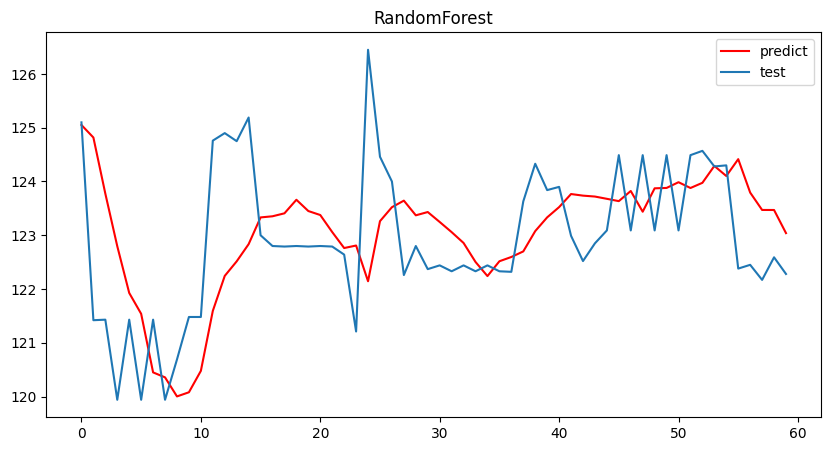

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test_df['y_pred'], 'r', label = 'predict')
plt.plot(y_test_df['y_test'], label = 'test')
plt.title('RandomForest')
plt.legend()
plt.show()

# CatBoost

In [ ]:
index_train = df_combined[df_combined['date']=='2016-12-01'].index[0]

In [ ]:
diff_series = df_combined['value'].diff().dropna()

train_series = diff_series[:index_train-1]
test_series = diff_series[index_train-1:]

In [ ]:
train_df_shift, y_train = make_forecasting_frame(train_series, kind="value", max_timeshift=10, rolling_direction=1)
test_df_shift, y_test = make_forecasting_frame(test_series, kind="value", max_timeshift=10, rolling_direction=1)

Rolling: 100%|██████████| 60/60 [00:00<00:00, 265.07it/s]


In [ ]:
X_train = extract_features(train_df_shift, column_id="id", column_sort="time", column_value="value", show_warnings=False)
X_test = extract_features(test_df_shift, column_id="id", column_sort="time", column_value="value", show_warnings=False)

Feature Extraction: 100%|██████████| 59/59 [00:04<00:00, 11.89it/s]


In [ ]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Заполнение NaN значениями
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
from catboost import CatBoostRegressor
import time
import optuna

def objective(trial):
    start_time = time.time()
    param = {
        'iterations': trial.suggest_int('iterations', 25,150),
        'depth': trial.suggest_int('depth', 5, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-4, 10),
        'verbose': 0
    }

    model = CatBoostRegressor(**param)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=15, verbose=False)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)

    end_time = time.time()
    print(f'Время: {(end_time - start_time)/60:.2f} минут')
    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)


trial = study.best_trial

[I 2024-08-13 16:15:49,152] A new study created in memory with name: no-name-17e4b260-201a-49db-8518-12c3eb64b2ed
[I 2024-08-13 16:15:49,920] Trial 0 finished with value: 0.8106870510840474 and parameters: {'iterations': 48, 'depth': 5, 'learning_rate': 0.03930087394547509, 'l2_leaf_reg': 0.9494724204399233}. Best is trial 0 with value: 0.8106870510840474.


Время: 0.01 минут


[I 2024-08-13 16:15:54,136] Trial 1 finished with value: 0.8302555923021367 and parameters: {'iterations': 50, 'depth': 8, 'learning_rate': 0.04910422267223164, 'l2_leaf_reg': 4.208577117315147}. Best is trial 0 with value: 0.8106870510840474.


Время: 0.07 минут


[I 2024-08-13 16:18:12,939] Trial 2 finished with value: 0.8375034137905109 and parameters: {'iterations': 79, 'depth': 12, 'learning_rate': 0.00016412973769277826, 'l2_leaf_reg': 0.09759644118309989}. Best is trial 0 with value: 0.8106870510840474.


Время: 2.31 минут


[I 2024-08-13 16:18:28,074] Trial 3 finished with value: 0.8375278815034964 and parameters: {'iterations': 92, 'depth': 9, 'learning_rate': 0.00013717972663266481, 'l2_leaf_reg': 0.19774696648326875}. Best is trial 0 with value: 0.8106870510840474.


Время: 0.25 минут


[I 2024-08-13 16:21:29,550] Trial 4 finished with value: 0.8199288921718554 and parameters: {'iterations': 105, 'depth': 12, 'learning_rate': 0.013820332945677688, 'l2_leaf_reg': 0.007880926230795875}. Best is trial 0 with value: 0.8106870510840474.


Время: 3.02 минут


[I 2024-08-13 16:21:32,302] Trial 5 finished with value: 0.8338261720429402 and parameters: {'iterations': 63, 'depth': 7, 'learning_rate': 0.0015230574134012644, 'l2_leaf_reg': 0.00041912827576961087}. Best is trial 0 with value: 0.8106870510840474.


Время: 0.05 минут


[I 2024-08-13 16:21:33,170] Trial 6 finished with value: 0.8204828621033783 and parameters: {'iterations': 34, 'depth': 6, 'learning_rate': 0.021452673652142318, 'l2_leaf_reg': 0.06140294327527271}. Best is trial 0 with value: 0.8106870510840474.


Время: 0.01 минут


[I 2024-08-13 16:21:38,798] Trial 7 finished with value: 0.8371856093967499 and parameters: {'iterations': 134, 'depth': 7, 'learning_rate': 0.0001225745703458122, 'l2_leaf_reg': 0.29782193459607054}. Best is trial 0 with value: 0.8106870510840474.


Время: 0.09 минут


[I 2024-08-13 16:21:43,250] Trial 8 finished with value: 0.8294595297281748 and parameters: {'iterations': 105, 'depth': 7, 'learning_rate': 0.0017578650548917393, 'l2_leaf_reg': 0.2220036167472392}. Best is trial 0 with value: 0.8106870510840474.


Время: 0.07 минут


[I 2024-08-13 16:21:57,220] Trial 9 finished with value: 0.828562872326191 and parameters: {'iterations': 66, 'depth': 9, 'learning_rate': 0.019983130719689098, 'l2_leaf_reg': 0.01696134715467729}. Best is trial 0 with value: 0.8106870510840474.


Время: 0.23 минут


In [ ]:
print(f'Лучшие параметры: {trial.params}')

best_params = trial.params
best_params['task_type'] = 'GPU'
best_model = CatBoostRegressor(**best_params)
best_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=15, verbose=False)
preds = best_model.predict(X_test)
mae = mean_absolute_error(y_test, preds )
print(f"MAE: {mae}")

Лучшие параметры: {'iterations': 48, 'depth': 5, 'learning_rate': 0.03930087394547509, 'l2_leaf_reg': 0.9494724204399233}
MAE: 0.8197295036066453


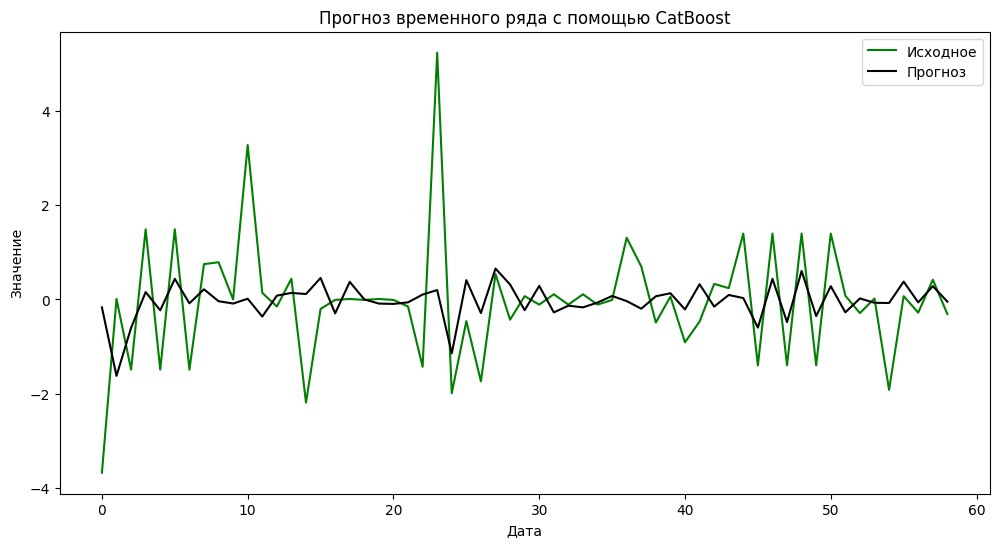

In [ ]:
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(preds, pd.Series):
    preds = preds.values


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Исходное', color='green')
plt.plot(preds, label='Прогноз' ,color='black')
plt.title('Прогноз временного ряда с помощью CatBoost')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

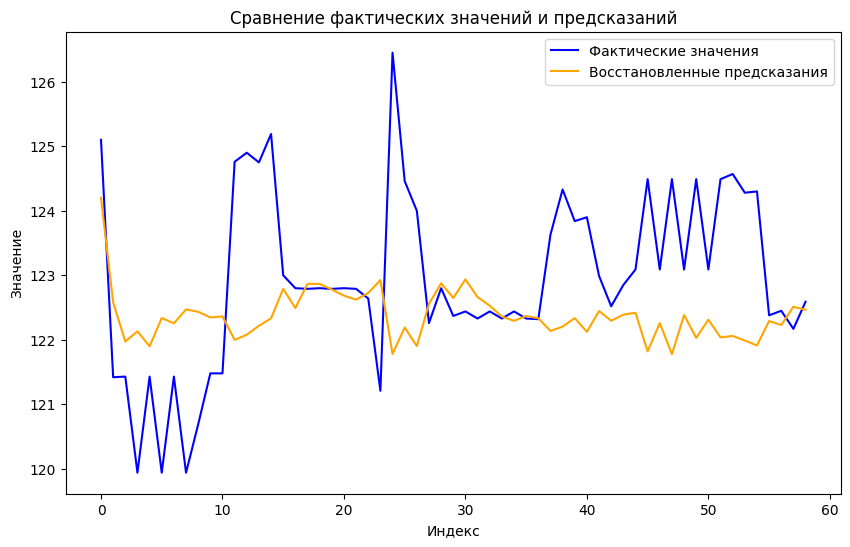

Восстановленный MAE: 1.1600195704969594


In [ ]:
last_known_value = df_combined.loc[index_train-1, 'value']


restored_preds = np.cumsum(np.concatenate([[last_known_value], preds]))

restored_preds = restored_preds[1:]

actual_values = df_combined.loc[index_train:, 'value'].values
actual_values = actual_values[:-1]


plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Фактические значения', color='blue')
plt.plot(restored_preds, label='Восстановленные предсказания', color='orange')
plt.title('Сравнение фактических значений и предсказаний')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.show()

mae_restored_cb = mean_absolute_error(actual_values, restored_preds)
print(f'Восстановленный MAE: {mae_restored_cb}')

In [ ]:
y_test_array = np.array(y_test)
y_pred_array = np.array(preds)

real_direction = np.sign(np.diff(y_test_array))
predicted_direction = np.sign(np.diff(preds))
real_direction = real_direction[:len(predicted_direction)]
accuracy_direction_cb = np.mean(real_direction == predicted_direction)
print("Accuracy of Direction Prediction:", accuracy_direction_cb)

Accuracy of Direction Prediction: 0.6379310344827587


# Total

In [ ]:
data = {
    "Модель": [
        "ARIMA без преобразований",
        "Хольт-Винтерс (лог+дифф)",
        "ARIMA (лог+дифф)",
        "SARIMA (лог+дифф)",
        "ARIMA (бокс-кокс+дифф)",
        "Хольт-Винтерс (бокс-кокс+дифф)",
        "SARIMA (бокс-кокс+дифф)",
        "RandomForest",
        "CatBoost"
    ],
    "MAE": [mae_arima,
            mae_log_diff_holt, mae_log_diff_arima, mae_log_diff_sarima,
            mae_box_diff_arima, mae_box_diff_holt, mae_box_diff_sarima,
            mae_rf,
            mae_restored_cb],
    "Точность направления": [accuracy_direction_arima,
                             accuracy_direction_log_diff_holt, accuracy_direction_log_diff_arima, accuracy_direction_log_diff_sarima,
                             accuracy_direction_box_diff_arima, accuracy_direction_box_diff_holt, accuracy_direction_box_diff_sarima,
                             accuracy_direction_rf,
                             accuracy_direction_cb]
}

models = pd.DataFrame(data)
models

,Модель,MAE,Точность направления
0,ARIMA без преобразований,1.376799,0.672414
1,Хольт-Винтерс (лог+дифф),2.170930,0.37931
2,ARIMA (лог+дифф),1.405328,0.551724
3,SARIMA (лог+дифф),1.565028,0.482759
4,ARIMA (бокс-кокс+дифф),1.497682,0.534483
5,Хольт-Винтерс (бокс-кокс+дифф),1.659127,0.396552
6,SARIMA (бокс-кокс+дифф),1.524243,0.396552
7,RandomForest,1.036711,0.534483
8,CatBoost,1.160000,0.637931
